# [Chapter 11 ]

*KU LeeDongGyu*

## 1. Introduction
---

In [1]:
#https://medium.com/@hobinjeong/cnn-convolutional-neural-network-9f600dd3b395
# 11-1)

# 우리가 지금까지 배운 네트워크는 Fully Connected 네트워크  (=Forward NN) 라고도 한다.
# X - ㅁ - ㅁ - ㅁ - Y / 단순선형인것.
# CNN은 고양이 실험에서 시작됨.
# 고양이에게 사진을 보여줬더니, 고양이의 시선이 어떤 그림의 부분에 초점을 둔 뒤, 이에 해당하는 뉴런이 반응함을 확인함.
# 어찌보면 입력을 나누어 집중적으로 받는것이며, 이에 착안하여 CNN을 시행하고 성공을 거둠.

# *뭘하는거냐면, 이전까지는 n*n 이미지를 쭉 길게 늘여놓고, 벡터로 연산했다면,
# *이제는 n*n 행렬 그자체로 보고, 각 연산을 시행하는거임.


# CNN은 간단히, 아래의 구조를 가짐.
# [ CONV  -> RELU -> CONV  -> RELU -> POOL ] * 3 정도 하고,
# FC를 한 뒤, 마지막의 softmax로 분류를 때리게 됨.

# 32*32*3 image가 주어졌다고 하자. 이때 3은 color임.
# 이때, 부분적으로 설명을 하기 위해 필터를 도입한다. (5*5*3)

# 이때, 필터의 size는 각 개인이 정의 할 수 있음. (5*5로 우리가 정의함.)
# 이때, 3은 늘 같게 됨. (역시 같이 RGB)

# 그리고 Filter는 하나의 값을 연산하게 함. 즉, 5*5*3 이 연산을 통해 1개의 숫자로 변함.
# 1개의 값으로 변환하는 방법은 XW + b를 통해 진행하고, ReLU를 연산한다.
# 즉, ReLU(XW + b) 이다. 이때, W(weight)는 어떤 숫자로 만들어 낼껀지를 결정하는 필터의
# 특성치라고 말할 수 있다.

# 즉, 필터는 W에 따라 달라지는 것이며, 같은 W(필터)를 가지고 32*32*3 인 전체 이미지를 
# 훑는다.

# 이때, 
# 이런 과정을 거치게 되면 몇개의 값을 얻게 될 수 있을까?? (간단한 산수임, 중요함)

# ex)
# 7*7 이미지에 3*3 필터를 거른다고 하자. 그러면,
# --> 5*5 개의 개수가 나온다. 이때 Stride=1일때 5*5이며,  Stride=1이란 한칸씩 움직이며 전체 이미지를
# 훑었다는 뜻이다.

# 만약 Stride = 2이면,
# --> 3*3개의 output이 생겨나게 된다.

# 결론 : Output size : { (N-F) / Stride } + 1 이다. 
# (N은 전체 이미지의 차원 - 가로or세로 각각봄. F는 필터의 차원  - 가로or세로 각각봄.)
# 위의 예에서 stride 3 을 주면, 2.33이게 되고, 이는 할 수 없게 되는거임.

# 이때, 위에서 보듯 Output이 작아지는 것을 확인할 수 있고, 이는 우리가 정보를 잃어버린
# 다는 뜻임.

# 그래서 실제로 CNN을 사용할때는 Zero Padding이라는 것을 사용함.
# 예를들어,
# 7*7의 테두리에 0짜리를 1pixel(1줄) 둘러 쌓는다. 그러면, 9*9짜리가 되고,
# Stride=1이라면, 3*3필터를 사용한 경우, 7*7짜리 Output이 나온다! -> 같은 Size의 결과가 나온다.

# 이렇게 Padding을 통해서 Size가 같아지게 하는 방식을 일반적으로 취함.
# 그리고 Input과 Output이 같아지는 Zero Padding을 하는 줄의 수는 (F-1)/2이며, 예를들면
# F = 3 -> zero pad with 1
# F = 5 -> zero pad with 2
# F = 7 -> zero pad with 3
# 이다.

# ***** output = floor( (N-F+2P ) / S ) + 1  이다. (짝수, 홀수 관계없이) *****
# ***** padding = ceil( (F-1)/2 ) (짝수, 홀수 관계없이) *****

# 가급적 필터의 개수는 짝수가 아닌 홀수를 사용하는데, 이는 input에 따른 output의 개수를 조절하기 쉽게 하려고
# 그러는거임. 짝수로 필터를 쓰면 코딩이 머리아픔. 홀수개를 쓰자!

# 참고 : (찾기: 짝수)
# https://tensorflow.blog/%ED%95%B4%EC%BB%A4%EC%97%90%EA%B2%8C-%EC%A0%84%ED%95%B4%EB%93%A4%EC%9D%80-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4/



# 이제 전반적인 알고리즘을 살펴보자.
# 전체 이미지가 32*32*3 짜리 있다고 해보자.
# 그리고 필터1, 필터2 는 5*5*3 짜리를 갖는다고 하자 (필터 1과 2는 W가 다르고 차원은같음)

# 이렇게 필터를 2개를 하는게 아니라, 필터를 6개를 사용한다고 하자.
# 그러면, Convolution Layer은 (?,?,6) 이 되게 된다. 
# ?는 Stride=1이고, Padding이 되지 않는다는 가정하에 28이 됨. (6개의 필터가 훑어진 하나의 층)
# 즉, 28*28*6짜리 Activation Map이 생김.

# 그리고 다시한번 CONV , RELU를 적용한다고 하면, 
# 필터는 5*5*6 (6짜리 깊이로 필터를 만들어야 함.) 이 되고, 이런 필터를 10개를 사용한다고하면
# 다음 Convolution Layer은 24*24*10짜리 Activation Map이 생김.

# 이런 방식으로 Convolution Layer가 진행됨.


# 그렇다면, Weight에 사요되는 Variables는 얼마나 될까? 에 초점을 둘 수 있다.

# 첫번째 Filter에서 5*5*3*6개 였고, 두번째 Filter에서 5*5*6*10 개 였다.
# 이 weight도 처음에 초기화를 하고 가진 데이터로 학습하게 만드는거임.


In [ ]:
# 11-2)

# Max Pooling과 나머지에 대해 이야기해보자.

# 위에서 
# [ CONV  -> RELU -> CONV  -> RELU -> POOL ] 이 있었는데
# POOL 이 무엇일까?

# Pooling layer 은 간단히 Sampling 이라고 생각할 수 있다.
# 우리가 1개의 Convolution Layer를 만들었다고 했을 때 이 두께는 Filter의 수로 결정된다.
# 그리고 이 두께중 한 층을 잘라내어서 살펴보자.

# 이것을 Resize를 시행하고, 작게 만들어 낸다. (차원을 줄임. 이를 Pooling(통합)이라고 함.)
# 이렇게 두께의 각 slice마다 진행해서 다시 차원을 축소한다.

# 예를들어 보자.
# MAX POOLING은 다음과 같이 진행된다.

# 4*4*k짜리 Activation Map 중 한조각을 떼네어 와서 4*4*1짜리를 본다고 하자.
# 그리고 Max Pooling을 위해 2*2 Filter로 Stride=2짜리를 사용한다.
# --> 이러면 2*2 Output이 주어질 것이다. 
# 이때 2*2 짜리 Output에는 어떤 값들을 채우게 할 것인가? 에 대한 이야기로
# 기존에 가진 4*4*1에서 2*2필터로 훑어지는 값들 중 각 구역(4개)의 최댓값을 Output의 2*2에 
# 채워넣게 된다.

# * Pooling은 보통 Zero Padding을 하지 않으며, 너무 많이 버릴 수 없다. (정보의 손실이므로)
# * 그렇기에, 보통 2*2필터로 stride=2를 주고 Pooling을 하게 된다.

# 이게 우리가 자주 쓰는 MAX POOLING이다. 그리고, 전체의 값들 중에 뽑기 때문에 Sampling이라고 불림.
# 이렇게 나오는 Output 또한 { (N-F)/stirde } +1로 정해진다.

# 이렇게,  
# [ CONV  -> RELU -> CONV  -> RELU -> POOL ] 를 시행하게 된다.
# 여기서 , 위의 형태는 고정이 된 것이 아니다. 내가 원하는데로 쌓는거임
# CONV 한 뒤 바로 Pooling할 수 있고, CONV를 굉장히 많이 한 뒤 Pooling 할 수 있다.
# 참고) ReLU는 sparse하게 만드는 성질을 가지고 있다. - 약간 dropout의 효과와 비슷하게 만드나봄?

# 그리고 마지막에 Pooling 을 하게 되서 나온 값들이 있다고 하자.
# 예를 들면 그 값이 3*3*10 이라고 하자.

# 그러면 이걸 우리가 원하는 만큼 일반적인 NN을 시행하게 된다. (Fully Connected를 통해)
# 그리고 Softmax를 사용해서 Classifier을 진행하게 된다.  이렇게 NN을 구성하면 된다.

In [ ]:
# 11-3)

# CNN의 case study

# 사람들이 어떻게 응용했는지에 대해 살펴보도록 하자.


# 1. Case Study : LeNet-5
# 처음 CNN을 고안한 사람 : LeCun 교수님.

# 손으로 쓴 글씨가 주어지면,  CNN을 사용 하게 되고
# 원래 28*28이 주어졌다면,

# 처음엔 5*5짜리 필터로 stride=1을 준다. 6개의 필터를 사용
# Pooling은 2*2짜리 stride =2를 줌. 

# 이렇게 쭉 가게 됨. (위에서 했던 일반적인 CNN과 매우 흡사)


# 2. Case Study : AlexNet
# 2012년 많은사람들의 관심을 끌었던 Net

# 227*227*3과 같은 큰 이미지에,

# 첫번째 CONV에 96개짜리 11*11*3짜리 필터를 사용, stride=4를 준다.
# -> 계산하면 55*55*96짜리 Activation Map이 만들어짐.
# 이때 모수의 개수는 11*11*3*96 = 35K의 개수가 필요함. -> 학습

# 두번째는 Pooling Layer을 주고 3*3짜리 필터에 stride=2 를 줬다.
# Output은 27*27*96 이 되고,
# 이건 Pooling이니 모수의 개수는 0 개가 필요. 
# (0인지, 0!인지 모르겠다.. 특별한 변수가 필요없다 하였으므로, 아마 0인듯)

# 이렇게 여러번 반복하는데, 좀 깊다.
# 이 중, 우리가 이야기 하지 않은 Normalization Layer이 있으며, 중간중간에 사용함을
# 볼 수 있다. 그냥 정규화 시키는거며, 최근들어서는 자주 사용하지는 않는다.
# -안해도 된다고 한다.-

# AlexNet은
# [ CONV -> MAXPOOL -> NORM ] *2 -> CONV * 3 -> MAXPOOL
# 을 시행함.
# 이렇게 마지막 MAXPOOL까지 시행하고 얻어진 값을 하나의 Fully Connected된
# 벡터에 넣어서 4096개의 출력을 만들어 낸다.

# 주의!!!!) 우리는 계속 1장의 데이터를 가지고 시행중임. 
# 즉, 6*6*256이 최종적으로 MAXPOOLING을 통해 만들어졌다면,
# 9216개의 x변수가 있는거나 다름없으며, 파이썬에는
# X = tf.placeholder(tf.float32 , name='X', shape=[None,9216] 인풋으로 시작되는것이나 다름없음.

# 다시 돌아와,
# 마지막에 4096, 4096, 1000은 우리가 계속 지금까지 해왔던 NN을 적용시킨것
# 이라고 생각하면 됨.

# 좀더 자세히는,
# AlexNet는 ReLU도 사용했으며, Droput=0.5 , batchsize = 128, 
# learning_rate = 0.01 , 7개의 앙상블, L2 weight를 사용 등등이 있다.
# (SGD Momentum = 0.9)


# 3. Case Study : GoogLeNet
# 2014년 나옴.

# 조금 다르게 생긴건 흩어졌다 모이는 형태를 가지고 있는데,
# 이를 Inception Module이라고 함.
# 병렬적으로 사용하고, 각 라인마다 다른형태의 Convolution을 함.
# (각 라인마다 순서도 뒤죽박죽이며, 다양한 횟수로 진행함.)

# 재밌는 구조로 되어 있으며, 이걸 굉장히 deep하게 구성하게 함.


# 4. Case Study : ResNet  - He et al. 
# ILSVRC 2015 winner.
# 사람이 이미지를 잘못분류하는 5%를 깨고 , 인공지능이 이기게 되는 알고리즘
# 3.6%까지 오분류율을 줄임.

# 다른 대회에서도 굉장히 적용이 잘되는 알고리즘

# ResNet은 152개의 층이 있음.
# (알렉스넷은 8층, VGG는 19층인것에 비해 굉장히 깊음)

# 이러면, 학습하기 어려울것이라고 생각한다. 이를 어떻게 극복했을까?
# 이를 Fast Forward를 통해서 극복함.

# 층을 건너 뛰어나가면서 더해지기 때문에, 전체적인 깊이는 깊지만 
# 실제로 학습하는 입장에서 보면 그렇게 깊지는 않다.
# 구체적으로 잘 작동되는 원리는 아직 나오지 않음.

# GoogLeNet과 RestNet은 상당히 유사하다.

# 기타로,
# Yoon Kim 박사가(한국)  텍스트에서도 CNN을 사용했고 잘 적용이 된다.
# 또 DeepMind의 알파고가 CNN을 사용했음.
# 네이쳐에 구체적인 정보가 수록되어있음.

## 2. CNN - Basics
---

(1, 3, 3, 1)
AxesImage(54,36;334.8x217.44)


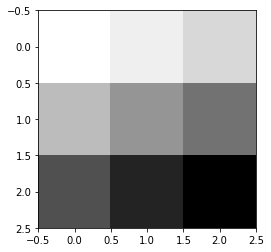

In [3]:
#%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sess = tf.InteractiveSession() #sess.run 없이 eval이라는 매서드를 통해 자체실행 가능.
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
# 1 , 3 , 3 , 1
# 1 <- 데이터의 개수
# 3,3 <- 3*3 짜리
# 1 <- 색깔텀 (depth)
# (n , p , q , depth ) 이런 느낌. n은 batch_size라고 하는것이 더 정확하다.
# 위의 사실은 코딩을 쉽게하기 위해 미리약속한 것이므로, 받아들이기.

print(image.shape)
print(plt.imshow(image.reshape(3,3), cmap='Greys'))

In [9]:
#1 filter (2,2,1,1) with padding: VALID

# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]]) #필터 값. 원소별 곱해서 더하는거임.
# 2 , 2 , 1 , 1
# 2, 2 <- 2*2 짜리
# 1 <- 색깔텀 (depth)
# 1 <- 필터의 수
# ( p , q , depth , filters ) 이런 느낌.
# 위의 사실은 코딩을 쉽게하기 위해 미리약속한 것이므로, 받아들이기.
print("weight.shape", weight.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)


In [10]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
#이 함수 하나로 모든것이 끝남.

#"VALID" 옵션은 stride만큼 읽으면서 남게되는, 행렬의 맨 오른쪽과 맨 아래를 버리라는 뜻. (padding을 안하는거임.)
# 참고 : https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

#stride는 1*1 짜리임. 리스트의 0번째와 3번째의 1은 지켜주자. 또한,
#1번째와 2번째는 보통 같은수의 값을 넣는다.
#이건 내 느낌인데, 이렇게 strides를 하는 이유는 계산할 때 차원을 맞춰주기 위함이고,
#맨 앞의 1은 데이터와 연동되는칸, 맨뒤의 1은 depth과 연동되는 칸으로 생각된다....?
#즉, 존재의 의미를 위해 차원을 늘리고, 항등원인 곱셈의 항등원인 1을 넣어주는것 같음.

In [7]:
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
#shape는 (1,2,2,1)이 나오며, 이는 (n,p,q,col)로 바라볼 수 있다.

conv2d_img.shape (1, 2, 2, 1)


[[12. 16.]
 [24. 28.]]


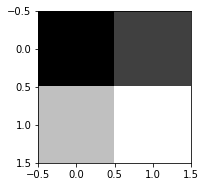

In [8]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
#계산을 볼 수 있다.

In [11]:
#2 filter (2,2,1,1) with padding:SAME

# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
#잊지말것. Weight는 필터임.

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)


In [12]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
#zero padding을 시행하겠다는 의미가  Padding = Same 임.

In [13]:
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
#1,3,3,1 을 확인할 수 있다.

conv2d_img.shape (1, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


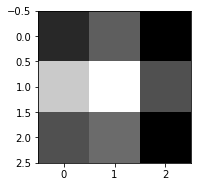

In [14]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [15]:
#3 filters (2,2,1,3)

# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]]) #필터 3개
# 2, 2, 1, 3
print("weight.shape", weight.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)


In [16]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
#zero padding을 해라 = same , padding 안한다 = valid
#3장의 이미지가 나온다. 또한 일부러 stride = 1을 주고, padding = same 을 하면 in, out의 출력이 같다.
#stride=1 을 unit stride라고 한다.
#그리고 이렇게 in과 out이 같은 padding을 "half padding" 이라고 한다!!!
conv2d_img = conv2d.eval()

#추가로 padding의 옵션에서는 full이라는 옵션도 있다. 줄 수 있는 한 가장 많은 padding
#을 부여하라는 것을 full padding이라고 한다.
#그리고 기본적으로 output은 내림을 기본으로 한다.

# output = floor( (N-F+2P ) / S ) + 1  이다. (짝수, 홀수 관계없이)
# padding = ceil( (F-1)/2 ) (짝수, 홀수 관계없이)

In [17]:
print("conv2d_img.shape", conv2d_img.shape)
#(1,3,3,3) 임. 이때는 (n,p,q,depth) 에서 depth이 기존의 color가 아닌, 필터의 개수로 들어오게 된다.

conv2d_img.shape (1, 3, 3, 3)


In [18]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("conv2d_img.shape", conv2d_img.shape)
#(3,3,3,1) 이 나옴.
#원래 conv2d (1,3,3,3)는 3x3짜리 가 3개의 필터를 가지고 1개짜리로 있었다. 이를 0번째와 3번째로 바꾸는 이유는,
#아래의 사진을 출력할때 인덱스를 필터개수당으로 하기 위해서 그럼. (3,3,3,1)은 3개짜리 필터가 3x3x1 을 지닌채로 들어온다는 뜻이됨.
#그래서 아래의 for문에서는 3개의 결과가 나오게 된다.

conv2d_img.shape (3, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


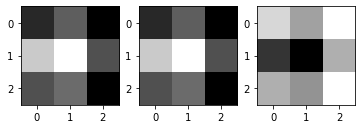

In [19]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
#루프는 3번돔. (i,one_img)가 튜플로 같이도는거임.

In [20]:
#MAX POOLING
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32) #주어진 이미지.
#(1,2,2,1)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
#max_pool이라는 함수를 사용함. CNN과 연동이 잘됨.
#역시나 pooling에서도 strides와 padding이 필요함.
#ksize는 필터로 쓰게될 차원의 크기이며,
#[1,2,2,1]이란 strides와 똑같이 적용된다. 2*2짜리를 1개의 batch_size에 대해 depth는 1짜리로 적용할거라는 뜻.
#거의 어지간하면 양 끝은 1,1로 주게 된다.

In [21]:
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


In [24]:
#SAME: Zero paddings
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
#image.shape 은 (1,2,2,1)이다. 위의 shape이 1,2,2,1이라는 말.
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')

In [23]:
print(pool.shape)
#(1,2,2,1) 이 나온다. 즉, zero padding을 하면 image와 같은 결과임. 당연하다.
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [26]:
###########실전 데이터에 넣어봐서 사용해봄. ###########

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
img = mnist.train.images[0].reshape(28,28) #데이터의 크기는 알려져있다.
#mnist.train.images[0].shape 는 784차원 벡터이다.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


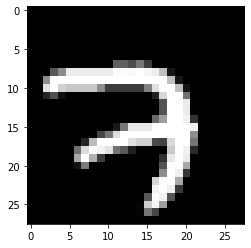

In [27]:
plt.imshow(img, cmap='gray')

sess = tf.InteractiveSession()

In [28]:
img = img.reshape(-1,28,28,1) #-1은 니가 알아서 계산해 라는 뜻. 사실 알고있으므로, -1대신 1을 써도 상관없다.
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# 3x3 x 1개짜리 칼라(깊이)/ 짜리 5개의 필터를 사용하겠음.
#위의 명령어는 초기값으로 (3,3,1,5)의 shape을지닌 랜덤난수를 생성하라는 뜻. 이때 표준편차는 0.01

In [29]:
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
#stride 는 2*2 짜리를 씀.
# 14* 14짜리로 출력됨. stride = 2기 때문. 

# p = ceil( (F-1) /2 )  
# output = floor( (N-F +2P) / S ) +1
#에 따라, p = 1 // output = floor( (28-3+2)/2 ) +1 = 14 굳굳.

In [30]:
print(conv2d)

Tensor("Conv2D_5:0", shape=(1, 14, 14, 5), dtype=float32)


In [31]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval() #값으로 반환해서 저장. 이게 가능하는 이유는 위에서 tf.InteractiveSession()을 했기 때문.
conv2d_img = np.swapaxes(conv2d_img, 0, 3) #역시나 축을 바꿔주고 봐보자.

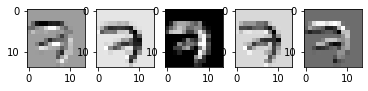

In [32]:
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
#이 과정 출력.
#5개의 조금씩 다른 이미지를 convolution으로 뽑아냄.

In [33]:
#이후 maxpooling을 시행해봄.
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
# 7* 7짜리로 출력됨. stride = 2 (가로,세로전부), filter = 2 (가로,세로전부) 이기 때문.

In [34]:
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

# P = ceil( (F-1)/2 ) = 0
# Outuput = floor( (N-F+2P) / S ) +1 = floor( (14-2+0)  /2) +1 = 7

Tensor("MaxPool_3:0", shape=(1, 7, 7, 5), dtype=float32)


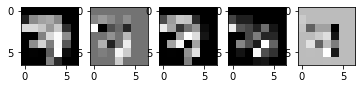

In [35]:
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

#subsampling 된것을 확인.
#이런 행위들이 정보를 몰아주는 행위인 것이다.

## 3. CNN - MNIST
---

In [36]:
# Case1 : CNN : 2 , FNN : 1

# Lab 11 MNIST and Convolutional Neural Network
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

In [37]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [38]:
# hyper parameters
learning_rate = 0.001
training_epochs = 3 #편의상.
batch_size = 100

In [39]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
#None 대신 -1로 입력함을 잊지말자. reshape에서는 이게 먹는다.
Y = tf.placeholder(tf.float32, [None, 10])

In [40]:
## start 

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#3*3짜리 필터 / 1개는 같고 / 32개는 필터갯수.
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1) #relu 통과시킴.
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], #2*2로 정해주고,
                    strides=[1, 2, 2, 1], padding='SAME')
#이게 다 거치면 14*14 로 거쳐짐.
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
'''
#print를 해보면 위처럼 나온다.


'\nTensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)\n'

In [41]:
# L2 ImgIn shape=(?, 14, 14, 32) , 두번째  Convolution Layer
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#3 * 3짜리 32deep한 큐브필터를 64개.
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
# padding은 같지만 stride 는 2이기에 사이즈는 절반
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64]) #값을 쭉 펼치기 위해서 reshape을 하게 됨.
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
'''
#maxpool하면 7*7 이기 때문. stride 는 2개였기 때문.

'\nTensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)\nTensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)\nTensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 3136), dtype=float32)\n'

In [42]:
# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], #out은 10개 (0~9)
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b #이게 hypothesis


## finish

In [43]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
#softmax로 나눔.
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


W0830 09:28:22.772222  5484 deprecation.py:323] From <ipython-input-43-ac7c13d3ee6b>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [44]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [45]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    #루프를 돌게 시킴.

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.348913584
Epoch: 0002 cost = 0.096695701
Epoch: 0003 cost = 0.072684324
Learning Finished!


In [46]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#cast는 tf.float32를 해줘야함을 잊지말것!!
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9802


In [47]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Label:  [8]
Prediction:  [8]


In [49]:
##################################
# Case2 : CNN : 3 , FNN : 2 

# Lab 11 MNIST and Deep learning CNN
#->> 정확도를 높이기 위해 이런 방법을 사용.

import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [50]:
# hyper parameters
learning_rate = 0.001
training_epochs = 3 #편의상 3번만.
batch_size = 100

In [51]:
# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

In [52]:
## start

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

W0830 09:33:52.580817  5484 deprecation.py:506] From <ipython-input-52-a20065841eb0>:11: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'\nTensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)\nTensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)\n'

In [53]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

'\nTensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)\nTensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)\nTensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)\nTensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)\n'

In [54]:
# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

In [55]:
# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

'\nTensor("Relu_3:0", shape=(?, 625), dtype=float32)\nTensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)\n'

In [56]:
# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''

## finish

'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [57]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [58]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [59]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.403807755
Epoch: 0002 cost = 0.094844263
Epoch: 0003 cost = 0.068890926
Learning Finished!


In [60]:
# Test model and check accuracy
# if you have a OOM error, please refer to lab-11-X-mnist_deep_cnn_low_memory.py

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
#정확도를 높였다!

Accuracy: 0.9884


In [61]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Label:  [7]
Prediction:  [7]


## 4.  CNN - Class & Layers & Ensemble & Batch size
---

In [62]:
#### Class ####

# Lab 11 MNIST and Deep learning CNN
import tensorflow as tf
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [63]:
# hyper parameters
learning_rate = 0.001
training_epochs = 2 #기니까... 2로 수정했음.
batch_size = 100

In [64]:
#파이썬의 클래스로 좀더 효과적으로 관리할 수 있다.
class Model:
    # m1이 self임.
    def __init__(self, sess, name): #초기값 설정. self변수는 내가 앞으로 설정할 변수의 이름을 받는 부분이므로, 이 함수의 실질 변수는 2개인 셈이다.
        self.sess = sess # self.sess라는 변수에는 sess를 입력
        self.name = name # self.name이라는 변수에는 name을 입력
        self._build_net() # 아래의 _build_net()이라는 함수를 실행한다.
        #이렇게 변수들을 저장하면 pypy 라는 class를 정의할 시 , pypy.sess ,  pypy.name 라고 자동으로 변수들이 저장된다.
        #session을 넘겨주면 편하다.

    def _build_net(self): #전체적으로 변수 앞에 self가 들어갔다.
        with tf.variable_scope(self.name): #self.name = name 이었으므로, 실제 우리가 넣은 name에 관련되어 scope가 저장됨.
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.keep_prob = tf.placeholder(tf.float32)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            # img 28x28x1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1]) # (n,p,q,depth)
            self.Y = tf.placeholder(tf.float32, [None, 10]) #결과적으로 분류할 Y

            # L1 ImgIn shape=(?, 28, 28, 1)
            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) #3*3*1 필터 32개 (p,q,depth,filters)
            #    Conv     -> (?, 28, 28, 32)
            #    Pool     -> (?, 14, 14, 32)
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') #same이므로, 아직까지 L1은 28*28 (stride=1이기에)
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME') #최대만 뽑아내고,
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob) #그 중 dropout으로 뽑아냄.
            #계속해서 1개의 데이터 내에서 보고있는 상황임.
            '''
            Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
            Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
            Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
            Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
            '''

            # L2 ImgIn shape=(?, 14, 14, 32) <- Activation Map을 이야기 함.
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            #    Conv      ->(?, 14, 14, 64)
            #    Pool      ->(?, 7, 7, 64)
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)
            '''
            Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
            Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
            Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
            Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
            '''

            # L3 ImgIn shape=(?, 7, 7, 64)
            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01)) #필터는 3*3 , L2 후에 pooling 한 Activation Map은 7*7 (즉 옆의 변수의 L2는 7*7)
            #    Conv      ->(?, 7, 7, 128)
            #    Pool      ->(?, 4, 4, 128) #pooling 하면 이렇게 뜸. // (9-3)/2 + 1 = 4
            #    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') #stride = 1  // 그래서 L3도 7*7 (same 이기 때문)
            # (F-1)/2 = zero padding의 수 이므로, 0으로 둘러 쌓은 벽이 1겹 생성됨. // => ( 7 - 3 + 2 ) / 1 + 1 = 7
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                                1, 2, 2, 1], padding='SAME') # =>   (9-3)/2 + 1 = 4
            #https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t
            #엄격한 정의는 위를 참고하고, 내가 이해한 것과 기본은 같다.

            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)

            L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4]) #
            '''
            Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
            Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
            Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
            Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
            Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
            '''

            # L4 FC 4x4x128 inputs -> 625 outputs
            #이 부분은 FC으로 펼쳐서 작업하는거.
            W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                                 initializer=tf.contrib.layers.xavier_initializer()) #여기서 초기값을 얻을때는 get_variable 함수를 통해, 자비에 초기값을 정함.
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)
            '''
            Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
            Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
            '''

            # L5 Final FC 625 inputs -> 10 outputs
            W5 = tf.get_variable("W5", shape=[625, 10],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5 #마지막은 그냥 이 자체로 쓰자. (어차피 softmax 안써도 1-1 이기 때문에 계산량 줄임.)

            '''
            Tensor("add_1:0", shape=(?, 10), dtype=float32)
            '''

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( #그래도 cost함수는 softmax의 cross_entropy를 사용.
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer( #아담사용.
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal( tf.argmax(self.logits, 1), tf.argmax(self.Y, 1) )
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #prediction과 정확도까지 끝.

    ###### 여기까지가 _build_net 함수였다. #########


    def predict(self, x_test, keep_prop=1.0): #예측값들 출력. logits만으로 끝냈기에, 확률을 출력해주는 것은 아니다.
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prop})
        #위에서 self.X , self.keep_prob를 placeholder로 변수 저장했음.
        # m1이 self임.

    def get_accuracy(self, x_test, y_test, keep_prop=1.0): #정확도 출력. self.accuracy를 실행함.
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7): #학습실행. cost를 출력한다. optimizer는 아무것도 출력하지 않음.
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})
#이렇게 만들면 쉽게 간단하게 학습을 시킬 수 있다.


In [65]:
# initialize
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer()) #이렇게 초기설정.

In [66]:
print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0 #방생성.
    total_batch = int(mnist.train.num_examples / batch_size) #range로 받기 위해 int로 설정함을 잊지말자.

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys) #우리가 위에서 class에서 정의한 도움함수.
                                            #train은 cost와 optimizer함수가 같이 있었고, 우리는 cost만 출력해서 볼거기 때문에 나머지를 _ 로 입력.
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

#우리가 앞으로 클래스를 사용하면 더 편리하게 코딩을 할 수 있다.

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = 0.377060679
Epoch: 0002 cost = 0.097418100
Learning Finished!


In [67]:
# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Accuracy: 0.9872


In [68]:
##########################################################################

#### Layers ####
# Lab 11 MNIST and Deep learning CNN
import tensorflow as tf
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [69]:
# hyper parameters
learning_rate = 0.001
training_epochs = 2 #기니까 2으로 수정.
batch_size = 100

In [70]:
class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool) #self.training을 T,F로 받을것인지에 대해 placeholder을 만듦! 보고 넘어가기.

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3], # strdies = (1,1) 이 초기값으로 들어가있는 상태임.
                                     padding="SAME", activation=tf.nn.relu)
            #아래를 위처럼 간략하게 나타낼 수 있다. 숫자를 보기가 편해짐. 이렇게하기.
            #####################################################################################
            # W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))                    #
            # L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')                #
            # L1 = tf.nn.relu(L1)                                                               #
            #####################################################################################


            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.3, training=self.training )
            #30%를 가지고, 70%를 버린다는 뜻임.... 이러면 일반적으로 학습효과가 그닥이라고 함
            #dropout 은 training이라는 옵션에 T,F를 줘서 에러를 방지 할 수 있음! self.training은 위에서 정의한 변수.
            #####################################################################################
            # L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #
            # L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)  # 그 중 dropout으로 뽑아냄.      #
            #####################################################################################

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #3 and Pooling Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="same", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="same", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4]) #이런걸 계산하기 위해서 (N-F +2P )/S +1 을 알아야함.
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu) #출력을 625로. 내마음대로 정함.
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training) #dropout비율은 50%로.

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10) #궁국적으로 10개

        ########################## 코드가 훨씬 더 깔끔해짐 #########################

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        ##### 여기는 위와 같음.

    def predict(self, x_test, training=False): #이렇게 training을 boolean 타입으로 쓰고 받아도 문제가 없게 됨.
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

################ 걍 코딩을 외우자. - 언젠가는 ################

In [71]:
# initialize
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

W0830 09:47:42.833297  5484 deprecation.py:323] From <ipython-input-70-786bdb874b5f>:23: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0830 09:47:42.929304  5484 deprecation.py:506] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0830 09:47:44.012016  5484 deprecation.py:323] From <ipython-input-70-786bdb874b5f>:34: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
W0830 09:47:44.196029  5484 deprecation.py:323] From <ipython-input

In [72]:
print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = 0.290037435
Epoch: 0002 cost = 0.088147824
Learning Finished!


In [73]:
# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Accuracy: 0.9872


In [74]:
##########################################################################

#### 앙상블 ####

# Lab 11 MNIST and Deep learning CNN
# https://www.tensorflow.org/tutorials/layers
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [79]:
# hyper parameters
learning_rate = 0.001
training_epochs = 1 #20인걸 편의상 1만 하자.
batch_size = 100

In [76]:
###################### 아래 class Model 은 바로 위에서 한 것과 같다 ###################
class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784]) #데이터를 받을 그릇.

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10]) #역시나 데이터를 받을 그릇.

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #3 and Pooling Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10) #activation에 아무것도 안줬으므로, 그대로 출력하는거임.
                                                                     #tf.nn.sigmoid , tf.nn.softmax 등이 올수 있음.
                                                                     # (데이터 * 10) 차원임.

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

#####################################################################################

In [77]:
sess = tf.Session()

models = [] #그릇을 만들어놓고
num_models = 2 #2개, 3개, 10개 마음대로 앙상블 할 개수를 선택.
for m in range(num_models):
    models.append(Model(sess, "model" + str(m))) #모델0, 모델1 을 각각의 models 리스트에 하나씩 저장. 이때 초기값이 다르므로, 다른 모델이 형성됨.
#이러면 클래스 instance가 생성됨.

sess.run(tf.global_variables_initializer())

In [80]:
print('Learning Started!')

# train my model
for epoch in range(training_epochs):  #이건 전체 학습시킬 횟수. 1번 하기로 했다.
    avg_cost_list = np.zeros(len(models)) # 0을 원소로 하는 2차원 벡터가 생성됨. 여기다가 cost들을 계산해낼꺼임.
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch): # 데이터는 일정하게 100개씩 뽑아올꺼임.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models): #뽑아온 100개의 데이터를 각 모델들에 적용하고, 각각의 cost를 출력해냄.
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch
        #m을 꺼내와서 학습을 시킴.

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = [0.28015284 0.28796809]
Learning Finished!


In [81]:
# Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10]) #행은 test 할 크기(데이터=1만), 열은 0~9에 해당하는 변수.
#즉, 데이터*10 차원의 행렬에 0을 원소로하는 공간을 생성.

In [82]:
#공간을 만들어버린다.
for m_idx, m in enumerate(models): # 0 , 0번째 모델 / 1, 1번째 모델 // 이렇게 돌아감.
    print(m_idx, 'Accuracy:', m.get_accuracy(mnist.test.images, mnist.test.labels)) #각 모델의 정확도를 일단 출력하고,
    p = m.predict(mnist.test.images) #각 모델의 예측값을 출력한 뒤 p변수에 저장한다.
    # 이때 , mnist.test.images는 10000*784 짜리 테스트 데이터들이고,
    # m.predict를 시행하면 각 모델에 해당하는 predict를 시행하게 된다. 이때 predict는 logits을 계산해줌을 명심하자.
    # mnist.test.images 는 test 변수로 새롭게 넣을 X데이터에 해당하고, 만들어진 모델 m 에 따라서 예측치를 출력한다.
    # 이때, 출력하는 예측치의 차원은 데이터*10 차원 행렬이다.

    predictions += p # 10000*10 행렬을 누적해서 통째로 더하는 과정임.

#각각의 모델들 학습. (C_1,C_2, ... , C_m) // 우리는 2개의 모델이므로, C_1 , C_2
#각 모델들 예측 시켜버리고, 각 케이스별로 , label별로 확률 값을 더해서 가장 큰 label의
#수치를 선택해버리면 됨.(간단한 방법)
#사실 엄밀히는 확률이 계산되는게 아닌, 로짓이 계산됨. 우리는 위에서 softmax를 사용하지 않았기 때문.
#그렇다해도, 큰 수치를 선택하면 되는 사실엔 변함이 없음.
#그게 위의 코딩.

0 Accuracy: 0.9841
1 Accuracy: 0.983


In [83]:
ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))
#좋은 성능을 관측 할 수 있다.

Ensemble accuracy: 0.9852


In [1]:
#########################################################################

#### Batch Size ####

# batch size에 따른 모델의 성능비교.
# MNIST가 아닐때, batch size만큼 뽑아올때 어떻게 할것인지에 대한 idea도
# 여기서 얻을 수 있다.

# Lab 10 MNIST and Deep learning CNN

import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

W0830 10:02:32.128280  5528 deprecation.py:323] From <ipython-input-1-8eeac0a7d8e9>:19: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0830 10:02:32.137098  5528 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0830 10:02:32.140093  5528 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.


Extracting MNIST_data/train-images-idx3-ubyte.gz


W0830 10:02:32.519166  5528 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0830 10:02:32.524163  5528 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0830 10:02:32.586167  5528 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# hyper parameters
learning_rate = 0.001
training_epochs = 2
batch_size = 100

In [3]:
# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

In [4]:
## start

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

W0830 10:02:43.530418  5528 deprecation.py:506] From <ipython-input-4-a20065841eb0>:11: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'\nTensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)\nTensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)\n'

In [5]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

'\nTensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)\nTensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)\nTensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)\nTensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)\n'

In [6]:
# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

In [7]:
# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

'\nTensor("Relu_3:0", shape=(?, 625), dtype=float32)\nTensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)\n'

In [8]:
# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''

'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [9]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

W0830 10:03:02.048843  5528 deprecation.py:323] From <ipython-input-9-1a53dd786435>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
# train my model
print('Learning stared. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning stared. It takes sometime.
Epoch: 0001 cost = 0.365058885
Epoch: 0002 cost = 0.100829688
Learning Finished!


In [12]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
########################### 이 위는 전부 같다. 아래를 살펴보자. ############################

In [14]:
def evaluate(X_sample, y_sample, batch_size=512):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0] # N 은 X_sample의 행의 수.
    correct_sample = 0 #초기값 설정.

    for i in range(0, N, batch_size): #이렇게 주게되면, i를 batch_size에 해당하는 것부터 띄엄띄엄 시작해서 주게된다. 꼭 기억하기.
        X_batch = X_sample[i: i + batch_size] #batch_size만큼 행을 뽑음. //  X_sample[i: i + batch_size , :] 와 같음.
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0] #행의 수. = 배치의 크기. batch_size라 봐도 무방하다.

        feed = {
            X: X_batch,
            Y: y_batch,
            keep_prob: 1
        }

        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch #배치 크기만큼 곱해줌. (비중을 곱하는 것.)

    return correct_sample / N

print("\nAccuracy Evaluates")
print("-------------------------------")
print('Train Accuracy:', evaluate(mnist.train.images, mnist.train.labels))
print('Test Accuracy:', evaluate(mnist.test.images, mnist.test.labels))



Accuracy Evaluates
-------------------------------
Train Accuracy: 0.9864181819308888
Test Accuracy: 0.9870999997138977


In [15]:
# Get one and predict
print("\nGet one and predict")
print("-------------------------------")
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), {X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()


Get one and predict
-------------------------------
Label:  [1]
Prediction:  [1]


## 5. Sources
---

- [Main site](https://hunkim.github.io/ml/)
- [Github](https://hunkim.github.io/ml/)